In [30]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [268]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
import requests
from bs4 import BeautifulSoup

In [182]:
# Base URL setup
base_url = 'https://www.tokopedia.com/search?navsource=&page={}&q=batik&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='

# Headers setup
headers = {
    'Accept': '*/*',
    'Origin': 'https://www.tokopedia.com',
    'Referer': 'https://www.tokopedia.com/',
    'Sec-Fetch-Dest': 'script',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'cross-site',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.15'
}

# List to hold all the collected product data
all_product_data = []

# Loop through pages 1 to 50
for page in range(1, 51):
    url = base_url.format(page)
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
        print(f"Scraped page {page}")

        soup = BeautifulSoup(response.content, 'html.parser')
        product_containers = soup.find_all('div', class_='prd_container-card')

        for product in product_containers:
            name_element = product.find('div', class_='prd_link-product-name')
            name = name_element.text.strip() if name_element else 'No Name'

            rating_element = product.find('span', class_='prd_rating-average-text')
            rating = rating_element.text.strip() if rating_element else 'No Rating'

            sold_element = product.find('span', class_='prd_label-integrity')
            sold = sold_element.text.strip() if sold_element else 'No Sales Info'

            price_element = product.find('div', class_='prd_link-product-price')
            price = price_element.text.strip() if price_element else 'No Price'

            all_product_data.append({
                'name': name,
                'rating': rating,
                'sold': sold,
                'price': price
            })

    except requests.Timeout:
        print("Request timed out")
    except requests.HTTPError as e:
        print(f"HTTP error on page {page}: {e}")
    except requests.RequestException as e:
        print(f"Error during requests on page {page}: {e}")

# Output the combined data for all pages
for item in all_product_data:
    print(item)

Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
Scraped page 11
Scraped page 12
Scraped page 13
Scraped page 14
Scraped page 15
Scraped page 16
Scraped page 17
Scraped page 18
Scraped page 19
Scraped page 20
Scraped page 21
Scraped page 22
Scraped page 23
Scraped page 24
Scraped page 25
Scraped page 26
Scraped page 27
Scraped page 28
Scraped page 29
Scraped page 30
Scraped page 31
Scraped page 32
Scraped page 33
Scraped page 34
Scraped page 35
Scraped page 36
Scraped page 37
Scraped page 38
Scraped page 39
Scraped page 40
Scraped page 41
Scraped page 42
Scraped page 43
Scraped page 44
Scraped page 45
Scraped page 46
Scraped page 47
Scraped page 48
Scraped page 49
Scraped page 50
{'name': 'Kemeja Batik Pria Murah Tangan Pendek - Merah - Kode B3 - Size L', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp50.000'}
{'name': 'Kemeja Batik Pria Murah Tangan Pendek - Hijau - Kode 

In [243]:
soup = BeautifulSoup(response.content, 'html.parser')
print(len(all_product_data))

1750


In [184]:
# product_names = soup.find_all('h1', class_='product-name')
# for product in product_names:
#     print(product.text.strip())
# print(len(product_names))

0


In [185]:
print(soup)

<!DOCTYPE html>

<html lang="id" translate="no">
<head>
<title data-rh="true">Jual batik | Tokopedia</title>
<meta charset="utf-8"/>
<meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
<link crossorigin="" href="https://assets.tokopedia.net" rel="preconnect"/><link href="https://assets.tokopedia.net" nonce="Ze40jLMHz85qIF9joumgRA==" rel="dns-prefetch"/>
<link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/><link href="https://gql.tokopedia.com" nonce="Ze40jLMHz85qIF9joumgRA==" rel="dns-prefetch"/>
<link crossorigin="" href="https://googleads.g.doubleclick.net" rel="preconnect"/><link href="https://googleads.g.doubleclick.net" nonce="Ze40jLMHz85qIF9joumgRA==" rel="dns-prefetch"/>
<link crossorigin="" href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google-analytics.com" nonce="Ze40jLMHz85qIF9joumgRA==" rel="dns-prefetch"/>
<link crossorigin="" href="https://images.to

In [244]:
# Find all product containers
product_containers = soup.find_all('div', class_='prd_container-card')

product_data = []

for product in product_containers:
    # Extract the product name
    name_element = product.find('div', class_='prd_link-product-name')
    name = name_element.text.strip() if name_element else 'No Name'

    # Extract the rating
    rating_element = product.find('span', class_='prd_rating-average-text')
    rating = rating_element.text.strip() if rating_element else 'No Rating'

    # Extract the amount sold
    sold_element = product.find('span', class_='prd_label-integrity')
    sold = sold_element.text.strip() if sold_element else 'No Sales Info'

    # Extract the product price
    price_element = product.find('div', class_='prd_link-product-price')
    price = price_element.text.strip() if price_element else 'No Price'

    product_data.append({
        'name': name,
        'rating': rating,
        'sold': sold,
        'price': price
    })

# Do something with product_data, like printing it out
for item in product_data:
    print(item)

{'name': 'Kemeja/Baju Batik Pria Furing Lengan Panjang KF016', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp185.000'}
{'name': 'Kemeja/Baju Batik Pria Furing Lengan Panjang KF026', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp185.000'}
{'name': 'Kemeja/Baju Batik Pria Furing Lengan Panjang KF023', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp185.000'}
{'name': 'Kemeja/Baju Batik Pria Furing Lengan Panjang KF018', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp185.000'}
{'name': 'Kemeja/Baju Batik Pria Furing Lengan Panjang KF019', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp185.000'}
{'name': 'KEMEJA BATIK PRIA SLIM FIT / BAJU BATIK PRIA SLIM FIT OL217', 'rating': '5.0', 'sold': '2 terjual', 'price': 'Rp130.000'}
{'name': 'Kain Batik Tulis Harley Davidson HD Sutra ATBM Pola Kemeja NZ', 'rating': 'No Rating', 'sold': 'No Sales Info', 'price': 'Rp1.425.000'}
{'name': 'Baju batik pria kemeja batik pria cowok lengan 

In [246]:
import pandas as pd
import csv
from io import StringIO

# Assuming 'product_data' is your list of dictionaries with product info
fieldnames = ['name', 'rating', 'sold', 'price']  # Define your CSV column headers

# Create a string buffer
csv_buffer = StringIO()

# Writing to the buffer as csv
writer = csv.DictWriter(csv_buffer, fieldnames=fieldnames)

# Write the header
writer.writeheader()

# Write the product data
for product in all_product_data:
    writer.writerow(product)

# Reset the buffer position to the start
csv_buffer.seek(0)

# Use pandas to read the CSV from the string buffer
df = pd.read_csv(csv_buffer)

# Now 'df' holds your data, and you can work with it
print(df.head())  # This will print the first few lines of your dataframe

                                                name     rating  \
0  Kemeja Batik Pria Murah Tangan Pendek - Merah ...  No Rating   
1  Kemeja Batik Pria Murah Tangan Pendek - Hijau ...  No Rating   
2  Kemeja pria batik tulis lengan panjang Berlapi...        5.0   
3  Kemeja Batik Pria Murah Tangan Pendek - Ungu -...        5.0   
4  Kemeja batik pria lengan pendek batik tulis la...        4.5   

            sold      price  
0  No Sales Info   Rp50.000  
1  No Sales Info   Rp50.000  
2     13 terjual  Rp340.000  
3      1 terjual   Rp50.000  
4     11 terjual  Rp280.000  


In [247]:
import numpy as np

# Convert 'price' to numeric, removing 'Rp' and '.' then convert to float
df['price'] = df['price'].replace({'Rp': '', '\.': ''}, regex=True).astype(float)

# Convert 'rating' to float, handling 'No Rating' by converting it to NaN
df['rating'] = pd.to_numeric(df['rating'].replace('No Rating', '0'), errors='coerce')

# # Function to convert shorthand textual numbers into integers
# def convert_shorthand_number(text):
#     text = text.lower().replace(' terjual', '').replace('+', '').strip()
#     if 'rb' in text:
#         return int(float(text.replace('rb', '')) * 1000)
#     elif text.isdigit():
#         return int(text)
#     else:
#         try:
#             return int(text)
#         except ValueError:
#             try:
#                 return int(float(text))
#             except ValueError:
#                 return np.nan  # Return NaN for cases that cannot be converted
def convert_shorthand_number(text):
    # First, check if the input is a string. If not, directly return 0 or convert to string.
    if not isinstance(text, str):
        return 0  # Assuming non-string (including NaNs) should default to 0
    # Apply transformations if it is a string.
    text = text.lower().replace(' terjual', '').replace('+', '').strip()
    if 'rb' in text:
        return int(float(text.replace('rb', '')) * 1000)
    elif text.isdigit():
        return int(text)
    else:
        return 0  # Return 0 for any non-handled non-numeric cases

# Apply the conversion function for 'sold', which handles 'rb', numbers, and non-numeric cases
df['sold'] = df['sold'].apply(convert_shorthand_number)

print(df)

                                                   name  rating  sold  \
0     Kemeja Batik Pria Murah Tangan Pendek - Merah ...     0.0     0   
1     Kemeja Batik Pria Murah Tangan Pendek - Hijau ...     0.0     0   
2     Kemeja pria batik tulis lengan panjang Berlapi...     5.0    13   
3     Kemeja Batik Pria Murah Tangan Pendek - Ungu -...     5.0     1   
4     Kemeja batik pria lengan pendek batik tulis la...     4.5    11   
...                                                 ...     ...   ...   
1745  BAJU KEMEJA BATIK SLIM FIT PRIA LENGAN PANJANG...     4.8  3000   
1746  Timofey Batik Slimfit Hitam Navy Coklat Kemeja...     4.8  3000   
1747  Kemeja Batik Pria Murah Lengan Panjang | Baju ...     4.6  4000   
1748  BAJU ATASAN kemeja batik pria lengan panjang l...     4.9   250   
1749  Kemeja Batik Pria Murah Lengan Panjang | Baju ...     4.7  7000   

         price  
0      50000.0  
1      50000.0  
2     340000.0  
3      50000.0  
4     280000.0  
...        ...  
1745

In [225]:
df.sample(100)

,name,rating,sold,price
508,635 Batik Jumbo Wanita Modern / Batik Modern B...,4.9,100+ terjual,145900.0
27,Singep Singkep Sarung Wadah Keris Ladrang Gaya...,4.9,90+ terjual,50000.0
1739,COD Baju Batik Couple Gamis Kemeja Blouse Sari...,4.7,40+ terjual,52795.0
982,Odza Classic Kemeja Batik Slimfit Modern Pria ...,4.8,100+ terjual,120000.0
1328,BAJU ATASAN kemeja batik pria lengan panjang l...,4.9,250+ terjual,129000.0
...,...,...,...,...
358,Kaos Batik Printing wayang Lengan Pendek Terba...,4.6,100+ terjual,34300.0
868,Batik Keris Blus Lengan 3/4 Pangestu Aji Kombi...,4.8,40+ terjual,475000.0
751,Outer Batik / Blazer Batik wanita / bolero wan...,4.9,100+ terjual,149900.0
75,Kemeja Batik Arkanza Motif Argani Pria Cowok L...,4.8,100+ terjual,219000.0


In [263]:
def create_keyword_column(df, column_name, keywords):
    """
    Creates a new binary column in dataframe based on the presence of a keyword in the 'name' column.

    Parameters:
    df (DataFrame): The DataFrame to modify.
    column_name (str): The name of the new column to create.
    keyword (str): The keyword to search for in the 'name' column.

    Returns:
    None: Modifies the DataFrame in place.
    """
    df[column_name] = df['name'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in keywords) else 0)

create_keyword_column(df, 'Lengan Panjang', ['lengan panjang', 'long sleeve', 'longsleeve', 'long sleeves'])
create_keyword_column(df, 'Lengan Pendek', ['lengan pendek', 'lengan 3/4', 'short sleeve', 'shortsleeve', 'long sleeves'])

create_keyword_column(df, 'Tulis', ['tulis'])
create_keyword_column(df, 'Cap', ['cap'])
create_keyword_column(df, 'Print', ['print', 'printing'])

create_keyword_column(df, 'Premium', 'premium')
create_keyword_column(df, 'Modern', ['modern', 'moderen'])
create_keyword_column(df, 'Formal', ['formal', 'rapi'])
create_keyword_column(df, 'Mewah', ['mewah', 'luxury'])

create_keyword_column(df, 'Dingin', ['dingin', 'adem', 'sejuk'])

create_keyword_column(df, 'SlimFit', ['slim fit', 'slimfit', 'body fit', 'bodyfit'])

create_keyword_column(df, 'Atasan', ['atasan','top'])
create_keyword_column(df, 'Bawahan', ['bawahan','bawah', 'bottom'])
create_keyword_column(df, 'Outer', ['luar', 'outer'])

create_keyword_column(df, 'Keluarga', ['keluarga','family'])
create_keyword_column(df, 'Dewasa', ['dewasa','adult'])
create_keyword_column(df, 'Remaja', ['remaja','teen', 'teenager'])
create_keyword_column(df, 'Anak', ['anak','bocah', 'kids', 'kid', 'children', 'child'])
create_keyword_column(df, 'Pria', ['pria', 'cowok', 'laki', 'man', 'bapak'])
create_keyword_column(df, 'Wanita', ['wanita', 'cewek', 'gadis', 'ibu'])
create_keyword_column(df, 'Seragam', ['seragam','sragam', 'uniform'])
create_keyword_column(df, 'Kantor', ['kantor', 'kantoran'])

create_keyword_column(df, 'Murah', 'murah')

create_keyword_column(df, 'Kemeja', ['kemeja', 'hem'])
create_keyword_column(df, 'Dress', ['dress', 'rok', 'dres'])
create_keyword_column(df, 'Koko', ['koko'])

create_keyword_column(df, 'Hitam', ['hitam', 'black'])
create_keyword_column(df, 'Merah', ['merah', 'red'])
create_keyword_column(df, 'Kuning', ['kuning','yellow'])
create_keyword_column(df, 'Biru', ['biru','blue', 'donker', 'dongker'])
create_keyword_column(df, 'Navy', ['navy'])
create_keyword_column(df, 'Hijau', ['hijau','green', 'matcha', 'tosca', 'toska', 'olive'])
create_keyword_column(df, 'Coklat', ['sogan','shogan', 'coklat', 'cokelat'])
create_keyword_column(df, 'Ungu', ['ungu', 'indigo'])
create_keyword_column(df, 'Maroon', ['maroon', 'merah marun', 'marun', 'merah maroon'])
create_keyword_column(df, 'Emas', ['emas', 'gold'])

create_keyword_column(df, 'Kain', ['kain', 'bahan dasar'])
create_keyword_column(df, 'Daster', ['daster'])

create_keyword_column(df, 'Gamis', ['gamis'])
create_keyword_column(df, 'Sutra', ['sutra', 'silk'])
create_keyword_column(df, 'Katun', ['katun','cotton', 'kattun'])
create_keyword_column(df, 'Satin', ['satin'])
create_keyword_column(df, 'Dobby', ['dobby', 'dobi', 'doby', 'dobbi'])
create_keyword_column(df, 'Furing', ['furing', 'lapis'])
create_keyword_column(df, 'Blouse', ['blouse', 'blus'])
create_keyword_column(df, 'Kebaya', ['kebaya'])

create_keyword_column(df, 'Jumputan', ['jumputan'])
create_keyword_column(df, 'Mega Mendung', ['mega mendung', 'megamendung', 'mega-mendung'])
create_keyword_column(df, 'Barong', ['barong'])
create_keyword_column(df, 'Naga', ['naga', 'dragon'])
create_keyword_column(df, 'Wayang', ['wayang'])
create_keyword_column(df, 'Binatang', ['binatang','hewan'])
create_keyword_column(df, 'Alam', ['alam','nature', 'pemandangan'])
create_keyword_column(df, 'Bunga', ['bunga'])
create_keyword_column(df, 'Kawung', ['kawung'])
create_keyword_column(df, 'Parang', ['parang'])
create_keyword_column(df, 'Songket', ['songket'])
create_keyword_column(df, 'Abimanyu', ['abimanyu'])
create_keyword_column(df, 'Sarimbit', ['sarimbit'])
create_keyword_column(df, 'Prada', ['prada'])
create_keyword_column(df, 'Iwan Tirta', ['iwan tirta'])
create_keyword_column(df, 'Sambung', ['sambung'])

create_keyword_column(df, 'Pekalongan', ['pekalongan', 'pkalongan'])
create_keyword_column(df, 'Solo', ['solo', 'surakarta'])
create_keyword_column(df, 'Jogja', ['jogja', 'jogjakarta', 'yogyakarta'])

create_keyword_column(df, 'Grosir', ['grosir'])

print(df)

                                                   name  rating      sold  \
0     Kemeja Batik Pria Murah Tangan Pendek - Merah ...    0.00  0.000000   
1     Kemeja Batik Pria Murah Tangan Pendek - Hijau ...    0.00  0.000000   
2     Kemeja pria batik tulis lengan panjang Berlapi...    1.00  0.001857   
3     Kemeja Batik Pria Murah Tangan Pendek - Ungu -...    1.00  0.000143   
4     Kemeja batik pria lengan pendek batik tulis la...    0.90  0.001571   
...                                                 ...     ...       ...   
1745  BAJU KEMEJA BATIK SLIM FIT PRIA LENGAN PANJANG...    0.96  0.428571   
1746  Timofey Batik Slimfit Hitam Navy Coklat Kemeja...    0.96  0.428571   
1747  Kemeja Batik Pria Murah Lengan Panjang | Baju ...    0.92  0.571429   
1748  BAJU ATASAN kemeja batik pria lengan panjang l...    0.98  0.035714   
1749  Kemeja Batik Pria Murah Lengan Panjang | Baju ...    0.94  1.000000   

         price  Lengan Panjang  Lengan Pendek  Tulis  Cap  Print  Premium  

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1750 non-null   object 
 1   rating          1750 non-null   float64
 2   sold            1750 non-null   int64  
 3   price           1750 non-null   float64
 4   Lengan Panjang  1750 non-null   int64  
 5   Lengan Pendek   1750 non-null   int64  
 6   Tulis           1750 non-null   int64  
 7   Cap             1750 non-null   int64  
 8   Print           1750 non-null   int64  
 9   Premium         1750 non-null   int64  
 10  Modern          1750 non-null   int64  
 11  Formal          1750 non-null   int64  
 12  Mewah           1750 non-null   int64  
 13  Dingin          1750 non-null   int64  
 14  SlimFit         1750 non-null   int64  
 15  Atasan          1750 non-null   int64  
 16  Bawahan         1750 non-null   int64  
 17  Outer           1750 non-null   i

In [194]:
# df.set_index('name', inplace=True)

In [264]:
df.drop('name', axis=1).corr()

,rating,sold,price,Lengan Panjang,Lengan Pendek,Tulis,Cap,Print,Premium,Modern,Formal,Mewah,Dingin,SlimFit,Atasan,Bawahan,Outer,Keluarga,Dewasa,Remaja,Anak,Pria,Wanita,Seragam,Kantor,Murah,Kemeja,Dress,Koko,Hitam,Merah,Kuning,Biru,Navy,Hijau,Coklat,Ungu,Maroon,Emas,Kain,Daster,Gamis,Sutra,Katun,Satin,Dobby,Furing,Blouse,Kebaya,Jumputan,Mega Mendung,Barong,Naga,Wayang,Binatang,Alam,Bunga,Kawung,Parang,Songket,Abimanyu,Sarimbit,Prada,Iwan Tirta,Sambung,Pekalongan,Solo,Jogja,Grosir,popularity
rating,1.000000,0.118863,-0.068432,0.037587,0.076087,-0.319612,0.011524,-0.049664,NaN,0.101855,0.008877,-0.006679,0.008144,0.135501,0.093954,NaN,0.094611,0.073989,0.070022,NaN,0.041292,-0.151789,0.132345,0.055375,0.100793,NaN,-0.163977,0.080136,-0.058318,0.038177,-0.330291,-0.014317,0.002351,0.063405,-0.230775,-0.026345,-0.189669,-0.106814,-0.097265,-0.037083,0.015338,0.049825,-0.001015,-0.016526,-0.093482,-0.062690,-0.122023,0.075433,0.059273,NaN,0.012179,NaN,0.034912,0.012888,NaN,-0.207797,0.009568,NaN,0.012564,0.011182,NaN,0.057442,-0.007514,0.013535,NaN,-0.026382,0.051141,NaN,0.005449,0.537947
sold,0.118863,1.000000,-0.234813,0.521163,-0.106658,-0.112957,-0.023749,-0.036654,NaN,-0.224881,0.051850,-0.019958,-0.016439,0.287185,-0.158386,NaN,-0.187726,-0.157834,-0.093427,NaN,-0.075520,0.444820,-0.204631,-0.081304,-0.147065,NaN,0.391424,-0.121486,-0.033877,0.279037,-0.082929,-0.037442,-0.048417,0.294032,-0.069042,0.265365,-0.063840,-0.041801,-0.034573,-0.109822,-0.016417,-0.124905,-0.046778,0.013505,-0.024535,-0.043684,-0.149535,-0.172320,-0.135371,NaN,-0.023594,NaN,-0.096933,-0.029285,NaN,-0.087771,-0.013730,NaN,-0.033502,0.016914,NaN,-0.162195,-0.041607,-0.019783,NaN,-0.026323,-0.106504,NaN,-0.007177,0.900944
price,-0.068432,-0.234813,1.000000,-0.047800,0.222470,0.433503,-0.011078,0.003487,NaN,-0.027631,-0.019456,-0.007825,-0.019271,-0.106593,-0.105557,NaN,-0.193859,-0.208899,0.007429,NaN,-0.125217,-0.103382,-0.082625,-0.031365,-0.023236,NaN,0.005217,-0.063767,-0.005756,-0.046267,-0.056655,0.045853,-0.014221,-0.012833,-0.016929,-0.027600,-0.074028,-0.008386,0.081058,0.084327,-0.026694,-0.165373,0.386683,-0.022517,0.034548,0.022735,0.051570,0.034802,0.007439,NaN,0.006134,NaN,0.351955,-0.015454,NaN,0.123892,-0.010496,NaN,-0.008086,-0.016683,NaN,-0.071728,0.088987,0.210424,NaN,-0.019999,-0.105717,NaN,-0.022782,-0.229262
Lengan Panjang,0.037587,0.521163,-0.047800,1.000000,-0.413319,0.065077,-0.038941,-0.033066,NaN,-0.175212,0.022718,-0.027520,0.007028,0.386779,0.164688,NaN,-0.294717,-0.250015,-0.128627,NaN,-0.139528,0.422081,-0.167282,0.187957,-0.040441,NaN,0.447257,-0.198498,0.032156,0.177854,-0.072236,0.077893,-0.025169,0.286343,-0.025682,0.281471,-0.085901,-0.009539,-0.007782,-0.164833,-0.014498,-0.201350,-0.049937,-0.158805,-0.033714,0.000265,0.180378,-0.248603,-0.200290,NaN,-0.005498,NaN,0.181923,-0.021681,NaN,0.087016,-0.019454,NaN,-0.007782,-0.021681,NaN,-0.250920,-0.009539,-0.027520,NaN,-0.007782,-0.122759,NaN,-0.027520,0.458893
Lengan Pendek,0.076087,-0.106658,0.222470,-0.413319,1.000000,0.009807,0.064583,0.035064,NaN,0.007127,0.013155,-0.017184,-0.017184,0.041564,-0.129056,NaN,-0.184029,-0.156116,-0.088903,NaN,-0.087125,0.100858,-0.005260,-0.083402,0.096717,NaN,0.027241,0.173585,-0.005589,0.114336,-0.061257,-0.032195,0.009230,-0.120595,0.000932,-0.127957,-0.047738,0.042608,-0.029798,-0.081112,-0.024316,-0.125729,-0.022499,0.298252,0.081570,0.036582,-0.014290,0.096946,-0.125067,NaN,0.013155,NaN,-0.094058,0.078855,NaN,0.040823,-0.012148,NaN,0.042829,-0.000682,NaN,-0.156681,0.003041,-0.017184,NaN,0.018620,-0.069848,NaN,0.066583,-0.057300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pekalongan,-0.026382,-0.026323,-0.019999,-0.007782,0.018620,0.041641,-0.002807,-0.003717,NaN,-0.024998,-0.002431,-0.001984

In [269]:
df.drop(['name', 'sold', 'rating'], axis=1).corr().sort_values('popularity')

,price,Lengan Panjang,Lengan Pendek,Tulis,Cap,Print,Premium,Modern,Formal,Mewah,Dingin,SlimFit,Atasan,Bawahan,Outer,Keluarga,Dewasa,Remaja,Anak,Pria,Wanita,Seragam,Kantor,Murah,Kemeja,Dress,Koko,Hitam,Merah,Kuning,Biru,Navy,Hijau,Coklat,Ungu,Maroon,Emas,Kain,Daster,Gamis,Sutra,Katun,Satin,Dobby,Furing,Blouse,Kebaya,Jumputan,Mega Mendung,Barong,Naga,Wayang,Binatang,Alam,Bunga,Kawung,Parang,Songket,Abimanyu,Sarimbit,Prada,Iwan Tirta,Sambung,Pekalongan,Solo,Jogja,Grosir,popularity
Tulis,0.433503,0.065077,0.009807,1.000000,-0.009173,-0.012145,NaN,-0.081679,-0.007942,-0.006483,-0.006483,-0.118161,-0.063069,NaN,-0.069424,-0.058894,-0.033538,NaN,-0.032868,0.088343,-0.079151,-0.034523,-0.060376,NaN,0.111538,-0.047927,-0.011241,-0.014663,0.017814,0.183747,-0.015925,-0.049875,0.057136,-0.028188,-0.022599,-0.013779,0.094523,0.151774,-0.009173,-0.047431,0.180317,0.006591,0.216224,-0.014529,0.431167,-0.059532,-0.047181,NaN,0.066780,NaN,0.033589,-0.010259,NaN,0.777375,-0.004583,NaN,-0.011241,-0.010259,NaN,-0.059108,0.072651,0.176496,NaN,0.041641,-0.037641,NaN,-0.006483,-0.235582
price,1.000000,-0.047800,0.222470,0.433503,-0.011078,0.003487,NaN,-0.027631,-0.019456,-0.007825,-0.019271,-0.106593,-0.105557,NaN,-0.193859,-0.208899,0.007429,NaN,-0.125217,-0.103382,-0.082625,-0.031365,-0.023236,NaN,0.005217,-0.063767,-0.005756,-0.046267,-0.056655,0.045853,-0.014221,-0.012833,-0.016929,-0.027600,-0.074028,-0.008386,0.081058,0.084327,-0.026694,-0.165373,0.386683,-0.022517,0.034548,0.022735,0.051570,0.034802,0.007439,NaN,0.006134,NaN,0.351955,-0.015454,NaN,0.123892,-0.010496,NaN,-0.008086,-0.016683,NaN,-0.071728,0.088987,0.210424,NaN,-0.019999,-0.105717,NaN,-0.022782,-0.229262
Merah,-0.056655,-0.072236,-0.061257,0.017814,-0.006737,-0.008920,NaN,-0.059990,-0.005833,-0.004761,-0.004761,-0.058983,-0.046322,NaN,-0.050990,-0.043256,-0.024633,NaN,-0.024140,0.103293,-0.058134,-0.025356,-0.044344,NaN,0.088320,-0.035201,-0.008256,-0.034394,1.000000,-0.008920,0.038471,-0.036631,-0.016598,-0.038533,-0.016598,0.105637,-0.008256,-0.028518,-0.006737,-0.034836,-0.011195,0.001372,-0.005833,0.044253,0.005852,-0.043724,-0.034653,NaN,-0.005833,NaN,-0.026061,-0.007535,NaN,0.035839,0.169873,NaN,0.062569,-0.007535,NaN,-0.043412,-0.010121,-0.004761,NaN,-0.008256,-0.027646,NaN,-0.004761,-0.214754
Furing,0.051570,0.180378,-0.014290,0.431167,0.075855,0.015608,NaN,-0.105406,-0.011981,-0.009780,-0.009780,0.071034,0.272701,NaN,-0.104733,-0.088847,-0.050596,NaN,-0.049584,0.229259,-0.119407,-0.015256,-0.083610,NaN,0.172224,-0.072302,-0.016958,-0.049391,0.005852,0.117399,0.001928,-0.075241,0.039565,-0.062328,-0.034093,0.009153,-0.016958,-0.025562,-0.013838,-0.071554,0.031202,0.086796,0.143329,0.063319,1.000000,-0.089810,-0.071177,NaN,-0.011981,NaN,-0.053530,0.104895,NaN,0.515299,-0.006913,NaN,-0.016958,0.024647,NaN,-0.089169,0.009153,-0.009780,NaN,-0.016958,0.056462,NaN,-0.009780,-0.180283
Alam,0.123892,0.087016,0.040823,0.777375,-0.007131,-0.009441,NaN,-0.063495,-0.006174,-0.005039,-0.005039,-0.091855,-0.049028,NaN,-0.053969,-0.045783,-0.026072,NaN,-0.025551,0.127078,-0.061530,-0.026837,-0.046935,NaN,0.103570,-0.037257,-0.008739,-0.025071,0.035839,0.239019,-0.012380,-0.038771,0.083564,-0.009994,-0.017568,-0.010712,-0.008739,0.030253,-0.007131,-0.036871,-0.011849,-0.036482,0.278147,-0.011294,0.515299,-0.046279,-0.036677,NaN,-0.006174,NaN,-0.027584,-0.007975,NaN,1.000000,-0.003562,NaN,-0.008739,-0.007975,NaN,-0.045949,-0.010712,-0.005039,NaN,-0.008739,-0.029262,NaN,-0.005039,-0.165331
Hijau,-0.016929,-0.025682,0.000932,0.057136,-0.005644,-0.007473,NaN,-0.036633,-0.004887,-0.003989,-0.003989,-0.050706,-0.038805,NaN,-0.042716,-0.036237,-0.020636,NaN,-0.020223,0.070727,-0.048701,-0.021241,-0.020005,NaN,0.067967,-0.029489,-0.006917,-0.040174,-0.016598,-0.007473,-0.009798,-0.030687,1.000000,-0.032280,-0.013905,-0.008478,-0.006917,-0.023891,-0.005644,-0.029183,-0.009378,0.013660,-0.004887,0.056244,0.039565,-0.036629,-0.029030,NaN,-0.004887,NaN,-0.021832,-0.006312,NaN,0.083564,-0.002820,Na

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['sold', 'rating', 'price']] = scaler.fit_transform(df[['sold', 'rating', 'price']])

In [252]:
import joblib

# save the used scaler
joblib.dump(scaler, 'min_max_scaler.joblib')

['min_max_scaler.joblib']

In [253]:
df['popularity'] = (0.675*df['sold'] + 0.325*df['rating'])
df.sample(50)

,name,rating,sold,price,Lengan Panjang,Lengan Pendek,Tulis,Cap,Print,Premium,...,Abimanyu,Sarimbit,Prada,Iwan Tirta,Sambung,Pekalongan,Solo,Jogja,Grosir,popularity
725,Batik Keris Sarung Dewasa Timbul Balian Cairo ...,1.00,0.014286,0.065055,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.334643
352,Kemeja pria batik tulis lengan panjang Berlapi...,1.00,0.001857,0.129909,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.326254
1653,BATIK PRIA ASLI PREMIUM ORIGINAL SUTRA,1.00,0.002857,0.345454,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.326929
1670,Batik Keris Sarung Dewasa Timbul Balian Cairo ...,1.00,0.014286,0.065055,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.334643
280,Odza Classic Kemeja Batik Slimfit Modern Pria ...,0.98,0.008571,0.040886,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.324286
774,Kemeja Batik Pria Murah Tangan Pendek - Ungu -...,0.00,0.000000,0.013092,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.000000
428,batik pria tangan panjang batik pria tangan pe...,0.98,0.014286,0.071501,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.328143
1484,Kemeja Batik Pria Murah Lengan Panjang | Baju ...,0.92,0.571429,0.010070,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.684714
1508,BATIK ARKANZA Motif PRADIPTA ADJI Kemeja Batik...,0.98,0.005714,0.073112,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.322357
1074,COD Baju Batik Couple Gamis Kemeja Blouse Sari...,0.94,0.005714,0.014218,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0.309357


In [199]:
df.sample(50)

,rating,sold,price,Lengan Panjang,Lengan Pendek,Tulis,Cap,Print,Premium,Modern,...,Abimanyu,Sarimbit,Prada,Iwan Tirta,Sambung,Pekalongan,Solo,Jogja,Grosir,popularity
name,,,,,,,,,,,,,,,,,,,,,
Kemeja Batik Pria Murah Tangan Pendek - Coklat - Kode B19 - Size L,NaN,NaN,50000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
635 Batik Jumbo Wanita Modern / Batik Modern Besar / Batik Big Size,4.9,100.0,145900.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,69.0925
COD Baju Batik Couple Gamis Kemeja Blouse Sarimbit Keluarga Pasangan,4.7,40.0,52795.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,28.5275
Batik Keris Kemeja Lengan Pendek Kembang Sari Manis 005S7KLFS9N,5.0,12.0,576000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9.7250
Baju Batik Couple Keluarga Model Terbaru / Set Couple Keluarga,4.9,100.0,40000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,69.0925
635 Batik Jumbo Wanita Modern / Batik Modern Besar / Batik Big Size,4.9,100.0,145900.0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,69.0925
BAJU ATASAN kemeja batik pria lengan panjang lapis furing slimfit,4.9,250.0,129000.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,170.3425
Kemeja Batik Pria Murah Lengan Panjang | Baju Batik Pria 1/Kemeja Pria,4.6,4000.0,42500.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2701.4950
kemeja batik pria lengan pendek big size warna ungu,4.7,1000.0,43000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,676.5275


In [212]:
df.columns

Index(['name', 'rating', 'sold', 'price', 'Lengan Panjang', 'Lengan Pendek',
       'Tulis', 'Cap', 'Print', 'Premium', 'Modern', 'Formal', 'Mewah',
       'Dingin', 'SlimFit', 'Atasan', 'Bawahan', 'Outer', 'Keluarga', 'Dewasa',
       'Remaja', 'Anak', 'Pria', 'Wanita', 'Seragam', 'Kantor', 'Murah',
       'Kemeja', 'Dress', 'Koko', 'Hitam', 'Merah', 'Kuning', 'Biru', 'Navy',
       'Hijau', 'Coklat', 'Ungu', 'Maroon', 'Emas', 'Kain', 'Daster', 'Gamis',
       'Sutra', 'Katun', 'Satin', 'Dobby', 'Furing', 'Blouse', 'Kebaya',
       'Jumputan', 'Mega Mendung', 'Barong', 'Naga', 'Wayang', 'Binatang',
       'Alam', 'Bunga', 'Kawung', 'Parang', 'Songket', 'Abimanyu', 'Sarimbit',
       'Prada', 'Iwan Tirta', 'Sambung', 'Pekalongan', 'Solo', 'Jogja',
       'Grosir', 'popularity'],
      dtype='object')

In [201]:
# import Model requirements
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [256]:
# Sepparate test data and train data
X = df.drop(['name', 'popularity', 'sold', 'rating'], axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [257]:
y.isna().value_counts()

popularity
False    1750
Name: count, dtype: int64

In [258]:
# Create model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [261]:
# Measure the prediction
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 0.0580240623665487


Feature Importances:
price             0.438041
Lengan Panjang    0.228738
SlimFit           0.122367
Atasan            0.025989
Merah             0.019601
Kemeja            0.018907
Navy              0.018680
Hijau             0.016517
Tulis             0.013810
Modern            0.013160
Furing            0.007956
Coklat            0.007492
Ungu              0.007460
Pria              0.007354
Hitam             0.007341
Lengan Pendek     0.006063
Kain              0.005708
Dobby             0.003898
Katun             0.003720
Songket           0.003364
Dingin            0.002856
Koko              0.002519
Biru              0.002018
Formal            0.001849
Pekalongan        0.001493
Print             0.001376
Kuning            0.001287
Satin             0.001181
Alam              0.000882
Naga              0.000701
Prada             0.000686
Sutra             0.000629
Iwan Tirta        0.000626
Kantor            0.000581
Daster            0.000561
Outer             0.000541
Emas   

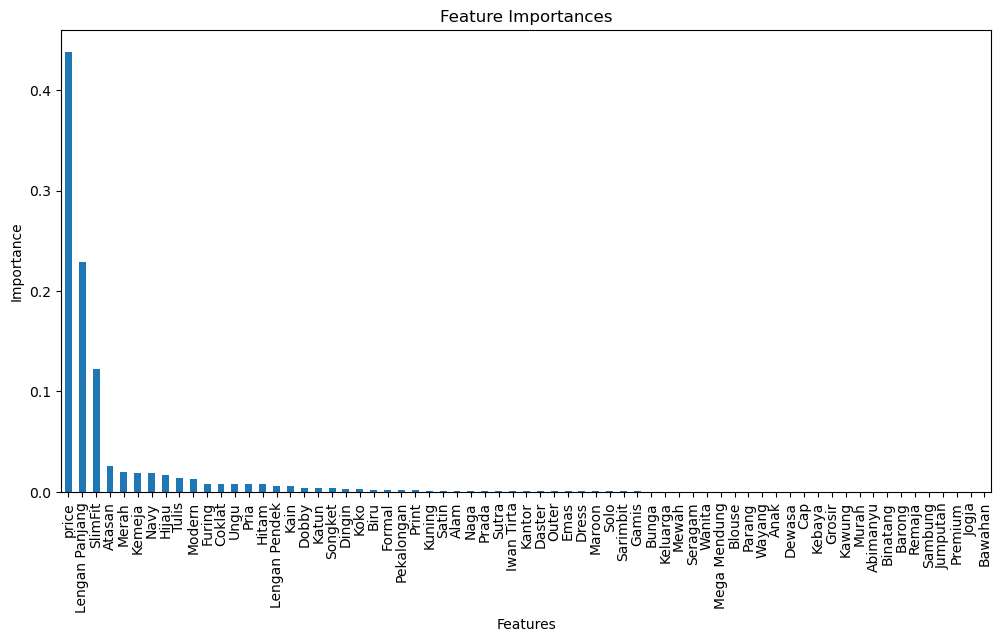

In [273]:
feature_importances = model.feature_importances_

# Create a pandas Series to view the feature importances with the feature names as index
feature_importances_series = pd.Series(feature_importances, index=X_test.columns)

# Print the feature importances
print("Feature Importances:")
print(feature_importances_series.sort_values(ascending=False))

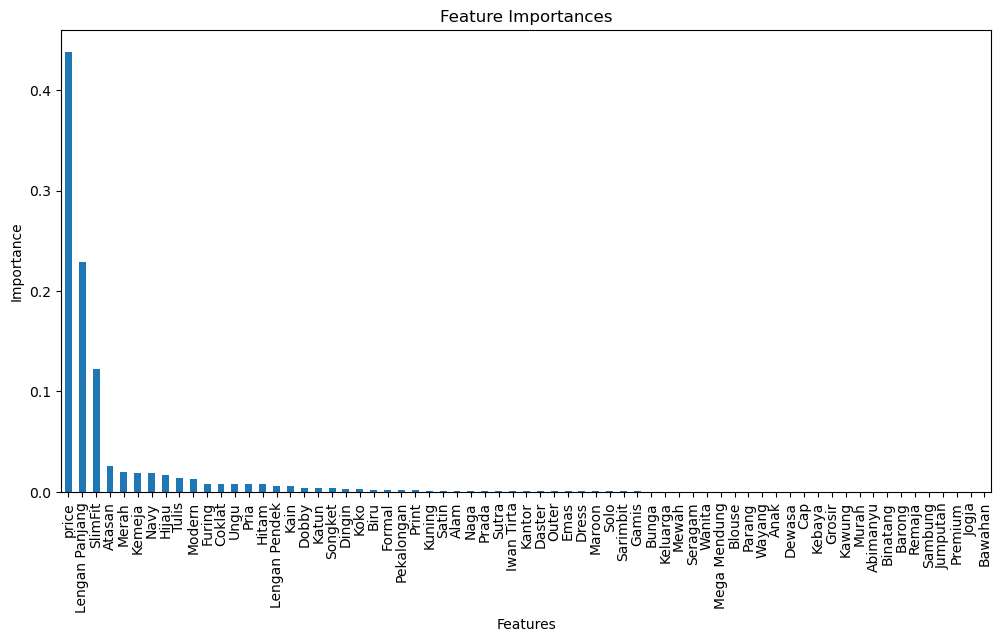

In [274]:
# Optional: Plot the feature importances for better visualization
import matplotlib.pyplot as plt

feature_importances_series.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()